<a href="https://colab.research.google.com/github/algaebrown/cse291spr21/blob/main/assignment3/assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
% cd gdrive/MyDrive/cse291_nlp/cse291spr21/assignment3/

/content/gdrive/MyDrive/cse291_nlp/cse291spr21/assignment3


In [14]:

#!pip install opt_einsum graphviz stanza
!python main.py --batch-size 128 --data data/PTB_LE10/ --save_path le_model_1 --draw_pred True

Building the fields
Namespace(batch_size=128, bos_index=2, buckets=32, clip=5.0, data='data/PTB_LE10/', delete={'', '?', '!', ',', '.', 'S1', 'TOP', '``', ':', "''", '-NONE-'}, dev='data/PTB_LE10/dev.pid', device='cuda', draw_pred=True, embed=None, encoder='lstm', eos_index=3, epochs=10, eps=1e-12, equal={'ADVP': 'PRT'}, feat=None, lr=0.002, max_len=None, mbr=True, mu=0.9, n_embed=100, n_labels=59, n_lstm_hidden=200, n_lstm_layers=2, n_tags=46, n_words=1331, nu=0.9, pad_index=0, save_path='le_model_1', test='data/PTB_LE10/test.pid', train='data/PTB_LE10/train.pid', unk='unk', unk_index=1, weight_decay=1e-05)
Building the model
Model(
  (word_embed): Embedding(1331, 100)
  (tag_embed): Embedding(46, 100)
  (embed_dropout): Dropout(p=0.33, inplace=False)
  (encoder): LSTM(200, 200, num_layers=2, dropout=0.33, bidirectional=True)
  (encoder_dropout): Dropout(p=0.33, inplace=False)
  (mlp_l): MLP(n_in=400, n_out=100, dropout=0.33)
  (mlp_r): MLP(n_in=400, n_out=100, dropout=0.33)
  (feat_b

In [17]:
!git commit -m "implement inside"


*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@bbdc5d264aa8.(none)')


In [ ]:

#!pip install opt_einsum graphviz stanza
!python main.py --batch-size 128 --data data/PTB_first_2000/ --save_path 2000_model_1 --draw_pred True
!mkdir 2000_model
!mv *.png 2000_model/

Building the fields
Namespace(batch_size=128, bos_index=2, buckets=32, clip=5.0, data='data/PTB_first_2000/', delete={"''", '', '.', 'S1', '?', '!', '-NONE-', ':', ',', '``', 'TOP'}, dev='data/PTB_first_2000/dev.pid', device='cuda', draw_pred=True, embed=None, encoder='lstm', eos_index=3, epochs=10, eps=1e-12, equal={'ADVP': 'PRT'}, feat=None, lr=0.002, max_len=None, mbr=True, mu=0.9, n_embed=100, n_labels=71, n_lstm_hidden=200, n_lstm_layers=2, n_tags=45, n_words=3511, nu=0.9, pad_index=0, save_path='2000_model_1', test='data/PTB_first_2000/test.pid', train='data/PTB_first_2000/train.pid', unk='unk', unk_index=1, weight_decay=1e-05)
Building the model
Model(
  (word_embed): Embedding(3511, 100)
  (tag_embed): Embedding(45, 100)
  (embed_dropout): Dropout(p=0.33, inplace=False)
  (encoder): LSTM(200, 200, num_layers=2, dropout=0.33, bidirectional=True)
  (encoder_dropout): Dropout(p=0.33, inplace=False)
  (mlp_l): MLP(n_in=400, n_out=100, dropout=0.33)
  (mlp_r): MLP(n_in=400, n_out=10

In [ ]:
import pandas as pd
df = pd.read_csv('le_model_1.loss.txt', header = None, names = ['type', 'epoch', 'loss', 'n'])

Text(0, 0.5, 'loss')

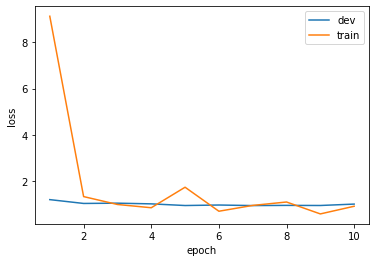

In [ ]:
import matplotlib.pyplot as plt
df.loc[df['type']=='dev'].set_index('epoch')['loss'].plot(label = 'dev')
df.loc[(df['type']=='train')&(df['n']==0)].set_index('epoch')['loss'].plot(label = 'train')
plt.legend()
plt.ylabel('loss')

In [ ]:
pd.concat([df.loc[(df['type']=='train')&(df['n']==400)], df.loc[df['type']=='dev']]).reset_index()[['epoch', 'type', 'loss']].to_latex()

'\\begin{tabular}{lrlr}\n\\toprule\n{} &  epoch & type &      loss \\\\\n\\midrule\n0 &      1 &  dev &  1.342575 \\\\\n1 &      2 &  dev &  0.975255 \\\\\n2 &      3 &  dev &  0.860999 \\\\\n3 &      4 &  dev &  0.960702 \\\\\n4 &      5 &  dev &  0.851696 \\\\\n5 &      6 &  dev &  0.796407 \\\\\n6 &      7 &  dev &  0.771163 \\\\\n7 &      8 &  dev &  0.814156 \\\\\n8 &      9 &  dev &  0.925864 \\\\\n9 &     10 &  dev &  0.765504 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [ ]:
import pandas as pd
df = pd.read_csv('le_model_1.metric.txt', header = None, names = ['epoch', 'metric', 'loss'])

In [ ]:
df

,epoch,metric,loss
0,1,UCM: 46.01% LCM: 42.33% UP: 88.45% UR: 84.33% ...,1.342575
1,2,UCM: 57.67% LCM: 54.60% UP: 91.63% UR: 88.49% ...,0.975255
2,3,UCM: 59.51% LCM: 57.06% UP: 92.76% UR: 90.94% ...,0.860999
3,4,UCM: 65.03% LCM: 62.58% UP: 93.09% UR: 92.41% ...,0.960702
4,5,UCM: 63.19% LCM: 61.35% UP: 93.70% UR: 91.06% ...,0.851696
5,6,UCM: 65.64% LCM: 63.19% UP: 93.19% UR: 93.76% ...,0.796407
6,7,UCM: 71.17% LCM: 68.71% UP: 94.44% UR: 93.64% ...,0.771163
7,8,UCM: 69.33% LCM: 67.48% UP: 94.58% UR: 94.00% ...,0.814156
8,9,UCM: 68.10% LCM: 65.64% UP: 94.31% UR: 93.27% ...,0.925864
9,10,UCM: 70.55% LCM: 68.71% UP: 94.35% UR: 94.00% ...,0.765504


In [ ]:
def parse_metric_str(mstr):
  items = mstr.replace(' ', '').split('%')
  d = {}
  for i in items[:-1]:
    
    name = i.split(':')[0]
    num = float(i.split(':')[1])
    d[name] = num
  return d



In [ ]:
metric_parsed = pd.DataFrame.from_dict(df['metric'].apply(parse_metric_str).tolist())
pd.concat([df, metric_parsed], axis = 1).drop('metric', axis = 1).to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n{} &  epoch &      loss &    UCM &    LCM &     UP &     UR &     UF &     LP &     LR &     LF \\\\\n\\midrule\n0 &      1 &  1.342575 &  46.01 &  42.33 &  88.45 &  84.33 &  86.34 &  84.08 &  80.17 &  82.08 \\\\\n1 &      2 &  0.975255 &  57.67 &  54.60 &  91.63 &  88.49 &  90.04 &  87.45 &  84.46 &  85.93 \\\\\n2 &      3 &  0.860999 &  59.51 &  57.06 &  92.76 &  90.94 &  91.84 &  89.39 &  87.64 &  88.50 \\\\\n3 &      4 &  0.960702 &  65.03 &  62.58 &  93.09 &  92.41 &  92.75 &  90.14 &  89.47 &  89.80 \\\\\n4 &      5 &  0.851696 &  63.19 &  61.35 &  93.70 &  91.06 &  92.36 &  90.55 &  88.00 &  89.26 \\\\\n5 &      6 &  0.796407 &  65.64 &  63.19 &  93.19 &  93.76 &  93.47 &  90.02 &  90.58 &  90.30 \\\\\n6 &      7 &  0.771163 &  71.17 &  68.71 &  94.44 &  93.64 &  94.04 &  91.73 &  90.94 &  91.33 \\\\\n7 &      8 &  0.814156 &  69.33 &  67.48 &  94.58 &  94.00 &  94.29 &  91.63 &  91.06 &  91.34 \\\\\n8 &      9 &  0.925864 &  68.10 &  6

In [ ]:
metric_terms = df['metric'].str.split(' ', expand = True)[[0,2,4,6]]

In [ ]:
df['metric'][0]

'UCM: 11.82% LCM:  9.71% UP: 78.98% UR: 80.55% UF: 79.76% LP: 76.50% LR: 78.01% LF: 77.25%'